<a href="https://colab.research.google.com/github/Devisrigudikandula/recipe-recommendation-ml/blob/main/Student_Placement_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
dataframe = pd.read_csv('/content/collegePlace.csv')
dataframe

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [5]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [6]:
dataframe.shape

(2966, 8)

In [10]:
dataframe['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [11]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


In [12]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [13]:
dataframe['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4},inplace=True)

<ipython-input-13-300c42c8fedd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4},inplace=True)


In [14]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [15]:
dataframe.isnull().sum()

,0
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [16]:
import matplotlib.pyplot as plt

In [17]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
hostel=dataframe['Hostel']
backlog=dataframe['HistoryOfBacklogs']
Y=dataframe['PlacedOrNot']

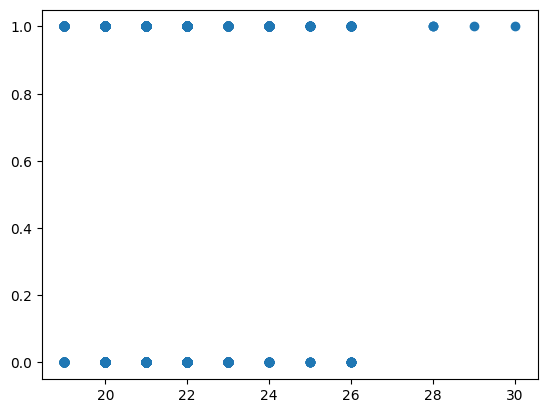

In [19]:
plt.scatter(age,Y)

In [20]:
Y = dataframe['PlacedOrNot']
X = dataframe.drop('PlacedOrNot', axis=1)

In [21]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,0,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,2,1,6,0,0
3,21,1,2,0,8,0,1
4,22,1,3,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,2,0,7,0,0
2962,23,1,3,1,7,1,0
2963,22,1,2,1,7,0,0
2964,22,1,1,1,7,0,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [44]:
from xgboost import XGBClassifier

In [58]:
clf = XGBClassifier(learning_rate=0.09,
                    n_estimators=150,enable_categorical=True)

In [49]:
type(stream[1])

int

In [66]:
type(gender[1])

numpy.int64

In [67]:
from xgboost import XGBClassifier
X_train['Stream'] = X_train['Stream'].astype('category')
X_test['Stream'] = X_test['Stream'].astype('category')
clf = XGBClassifier(learning_rate=0.09, n_estimators=150, enable_categorical=True)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
print("accuracy_score:" + str(accuracy_score(Y_test, predictions)))
print("recall_score:" + str(recall_score(Y_test, predictions)))
print("roc_auc_score:" + str(roc_auc_score(Y_test, predictions)))
print("precision_score:" + str(precision_score(Y_test, predictions)))

accuracy_score:0.8888888888888888
recall_score:0.8372093023255814
roc_auc_score:0.8986046511627908
precision_score:0.9664429530201343
